In [1]:
# coding: utf-8

from karateclub import NetMF, Node2Vec, FeatherNode

import osmnx as ox
import networkx as nx
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from copy import deepcopy

repo_path = str(Path.home()) + "/dev/GraphRouteOptimizationRL/"
graph_path = repo_path +     "datasets/osmnx/houston_tx_usa_drive_2000_slope.graphml"

output = repo_path + "datasets/embeddings/houston_tx_usa_drive_2000_slope"

G = ox.load_graphml(graph_path)
G = nx.relabel.convert_node_labels_to_integers(G, first_label=0, ordering='default')

In [30]:
def get_neighbors_embeddings(u):
    neighbors = list(G.neighbors(u))
    length_embeddings = np.zeros(G.number_of_nodes())
    speed_embeddings = np.zeros(G.number_of_nodes())
    travel_time_embeddings = np.zeros(G.number_of_nodes())
    grade_embeddings = np.zeros(G.number_of_nodes())
    for v in neighbors:
        length_embeddings[v] = G[u][v][0]['length']
        speed_embeddings[v] = G[u][v][0]['speed_kph']
        travel_time_embeddings[v] = G[u][v][0]['travel_time']
        grade_embeddings[v] = G[u][v][0]['grade']

for u in G.nodes():
    get_neighbors_embeddings(u)

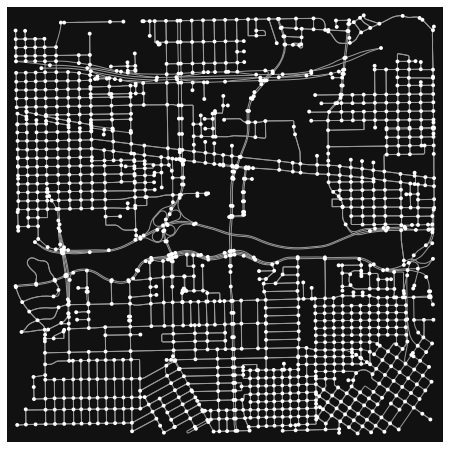

In [57]:
fig, ax = ox.plot_graph(G, show=False, close=False)

In [66]:
ax.plot(G.nodes[0]['x'], G.nodes[0]['y'], c='red', markersize=20)

AttributeError: 'PathCollection' object has no property 'markersize'

In [60]:
ax.scatter(G.nodes[2]['x'], G.nodes[2]['y'], c='blue')

In [64]:
ax.plot([G.nodes[0]['x'], G.nodes[2]['x']], [G.nodes[0]['y'], G.nodes[2]['y']], c='red')

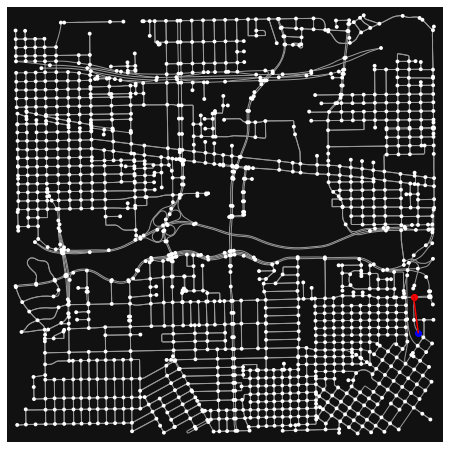

In [65]:
fig

In [20]:
model = NetMF(dimensions=8)
print("Fitting")
model.fit(G)

print("Getting embedding")
X = model.get_embedding()

Fitting
Getting embedding


In [21]:
np.save(output + "_netmf_tmp.npy", X)

In [ ]:



model = Node2Vec(dimensions=8, workers=16)
print("Fitting")
model.fit(G)

print("Getting embedding")
X = model.get_embedding()

np.save(output + "_node2vec.npy", X)

model = NetMF(dimensions=8)
print("Fitting")
model.fit(G)

print("Getting embedding")
X = model.get_embedding()

np.save(output + "_netmf.npy", X)


# model = FeatherNode(reduction_dimensions=32)

# print("Fitting")
# model.fit(G, X)

# print("Getting embedding")
# X = model.get_embedding()

# np.save(output + "e_netmf_feather_32d.npy", X)
